# Представленность нумизматики в пяти известных музеях России

In [1]:
pip install flatten_json

Note: you may need to restart the kernel to use updated packages.


**Запросим данные по пяти музеям, типология которых содержит "предметы нумизматики".**

Выбранные мной музеи включают в себя следующие учреждения — Музей Победы, Государственный Эрмитаж, Государственный Русский музей, Государственный исторический музей, Государственный музей изобразительных искусств им. А.С.Пушкина.

In [19]:
import pandas as pd
import json
import requests
from flatten_json import flatten

list_of_all_dfs = []

for s in range(0,222000,1000):
    url = '''https://opendata.mkrf.ru/v2/museum-exhibits/$?f={"data.museum.code":{"$search":"110200"}, "data.museum.code":{"$search":"110287"}, "data.museum.code":{"$search":"117356"}, "data.museum.code":{"$search":"118715"}, "data.museum.code":{"$search":"110111"}, "data.typology.name":{"$search":"предметы нумизматики"}}&s=%s&l=1000''' % s
    key = "8866ab0092cdf13ee7c712e78c162df8cdab65a927511c07a96914d5328d5a3b"
    response = requests.get(url, headers={"X-API-KEY": key})
    print('Запрошены строки с {} по {}'.format(s, s+1000), ', status = ', response.status_code)
    data = response.json()
    
    df = pd.DataFrame()
    for record in data['data']:
        ser = pd.Series(flatten(record))
        #df = df.append(ser.to_frame().T)
        df = pd.concat([df, ser.to_frame().T], ignore_index=True)
    list_of_all_dfs.append(df)

print('Done')

Запрошены строки с 0 по 1000 , status =  200
Запрошены строки с 1000 по 2000 , status =  200
Запрошены строки с 2000 по 3000 , status =  200
Запрошены строки с 3000 по 4000 , status =  200
Запрошены строки с 4000 по 5000 , status =  200
Запрошены строки с 5000 по 6000 , status =  200
Запрошены строки с 6000 по 7000 , status =  200
Запрошены строки с 7000 по 8000 , status =  200
Запрошены строки с 8000 по 9000 , status =  200
Запрошены строки с 9000 по 10000 , status =  200
Запрошены строки с 10000 по 11000 , status =  200
Запрошены строки с 11000 по 12000 , status =  200
Запрошены строки с 12000 по 13000 , status =  200
Запрошены строки с 13000 по 14000 , status =  200
Запрошены строки с 14000 по 15000 , status =  200
Запрошены строки с 15000 по 16000 , status =  200
Запрошены строки с 16000 по 17000 , status =  200
Запрошены строки с 17000 по 18000 , status =  200
Запрошены строки с 18000 по 19000 , status =  200
Запрошены строки с 19000 по 20000 , status =  200
Запрошены строки с 200

KeyError: 'data'

In [20]:
list_of_all_dfs

[                          _id  nativeId                      hash   data_id  \
 0    5c3e19b193fa687ca4a88ddb  10085156  2017-12-15T10:15:44.822Z  10085156   
 1    5c3e19b193fa687ca4a88de3  10085158  2017-12-15T10:15:44.822Z  10085158   
 2    5c3e19b193fa687ca4a88de7  10085160  2017-12-15T10:15:44.822Z  10085160   
 3    5c3e19b193fa687ca4a88df0  10085162  2017-12-15T10:15:44.822Z  10085162   
 4    5c3e19b193fa687ca4a88df8  10085164  2017-12-15T10:15:44.822Z  10085164   
 ..                        ...       ...                       ...       ...   
 995  5c3e1a5b93fa687ca4b27676  10318914  2018-01-09T08:02:10.747Z  10318914   
 996  5c3e1a5b93fa687ca4b2767d  10318915  2018-01-09T08:02:10.747Z  10318915   
 997  5c3e1a5b93fa687ca4b27684  10318916  2018-01-09T08:02:10.747Z  10318916   
 998  5c3e1a5b93fa687ca4b2768e  10318917  2018-01-09T08:02:10.747Z  10318917   
 999  5c3e1a5b93fa687ca4b27698  10318918  2018-01-09T08:02:10.747Z  10318918   
 
                                      

In [21]:
df_all = pd.DataFrame()
for df in list_of_all_dfs:
    df_all = pd.concat([df_all,df])

df_all

,_id,nativeId,hash,data_id,data_name,data_partsCount,data_regNumber,data_invNumber,data_gikNumber,data_type,...,changes_2_diff_9_value,data_typologyDesc,data_technologies_6,changes_0_diff_0_value_technologies_6,changes_0_diff_0_value_0_url,changes_0_diff_1_value,changes_0_diff_0_value_1_url,changes_0_diff_1_value_0,changes_0_diff_1_value_1,changes_0_diff_0_value_typologyDesc
0,5c3e19b193fa687ca4a88ddb,10085156,2017-12-15T10:15:44.822Z,10085156,монета. Венгрия. 2 форинта,1,9970911,Н-148194,ГМИИ КП-255169,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c3e19b193fa687ca4a88de3,10085158,2017-12-15T10:15:44.822Z,10085158,монета. Венгрия. 5 филлеров,1,9970910,Н-148198,ГМИИ КП-255173,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c3e19b193fa687ca4a88de7,10085160,2017-12-15T10:15:44.822Z,10085160,монета. Австрия. 10 грошей,1,9970909,Н-148175,ГМИИ КП-255150,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c3e19b193fa687ca4a88df0,10085162,2017-12-15T10:15:44.822Z,10085162,монета. Австрия. 5 грошей,1,9970907,Н-148172,ГМИИ КП-255147,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c3e19b193fa687ca4a88df8,10085164,2017-12-15T10:15:44.822Z,10085164,монета. Венгрия. 2 филлера,1,9970906,Н-148182,ГМИИ КП-255157,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5c3e180a93fa687ca490af26,9413601,2017-10-27T09:07:35.016Z,9413601,Монета. Золотая Орда. Джучиды. Пулад хан (1407...,1,9299500,Н-216804,ГМИИ КП-288132,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,5c3e180a93fa687ca490af28,9413602,2017-10-27T09:07:35.016Z,9413602,Монета. Золотая Орда. Джучиды. Пулад хан (1407...,1,9299499,Н-216809,ГМИИ КП-288137,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,5c3e180a93fa687ca490af2a,9413603,2017-10-27T09:07:35.016Z,9413603,"Монета. Золотая Орда. Джучиды, дирхем",1,9299498,Н-216766,ГМИИ КП-288094,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,5c3e180a93fa687ca490af2c,9413604,2017-10-27T09:07:35.016Z,9413604,Монета. Золотая Орда. Джучиды. Пулад хан (1407...,1,9299497,Н-216741,ГМИИ КП-288069,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Группировка по data_name

**Посмотрим, какие названия монет встречаются чаще, посчитаем их количество.**

In [22]:
name_counts = df_all['data_name'].value_counts().nlargest(10)
print(name_counts)

data_name
Монета. Золотая Орда. Джучиды. Пулад хан (1407-1413), дирхем    2532
Монета. Россия. Петр I (1689-1725). 1 копейка                   1744
Монета. Россия. Алексей Михайлович (1645-1676). 1 копейка       1308
Монета. Древняя Греция                                          1305
Монета. Римская республика, денарий                             1089
Монета. Россия. Иван IV Грозный (1533-1584), денга               990
Монета. Россия. Михаил Федорович (1613-1645). 1 копейка          795
монета. Россия. Иван IV Грозный (1533-1584), денга               790
монета. Россия. Петр I (1689-1725). 1 копейка                    667
Монета. Золотая Орда. Джучиды. Шадибек (1399-1408), дирхем       586
Name: count, dtype: int64


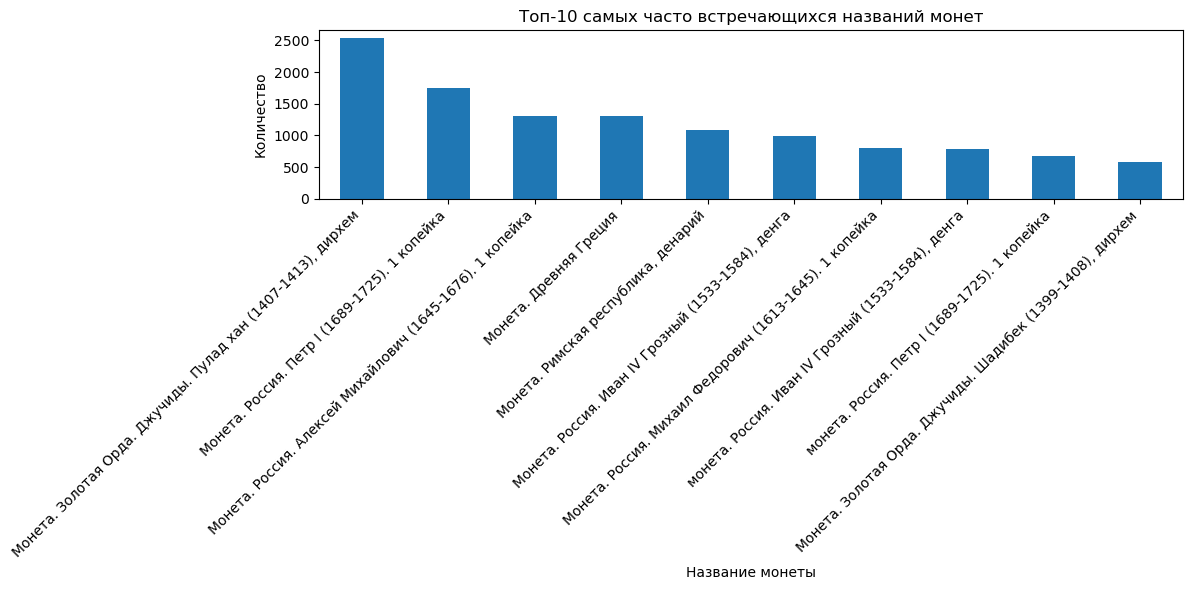

In [23]:
# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
name_counts.plot(kind='bar')
plt.title('Топ-10 самых часто встречающихся названий монет')
plt.xlabel('Название монеты')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Этот срез показывает 10 наиболее распространеных монет из набора данных выше. Среди них: "Монета. Золотая Орда. Джучиды. Пулад хан (1407-1413), дирхем"; "Монета. Россия. Петр I (1689-1725). 1 копейка "; "Монета. Россия. Алексей Михайлович (1645-1676). 1 копейка " и другие. Визуализация в виде столбчатой ​​диаграммы позволяет легко сравнивать совпадения названий.

### Поиск и фильтрация данных

**Найдем монеты, в названии которых есть упоминание Великой Отечественной войны.**

In [31]:
# Фильтрация данных
a = df_all['data_name']
filtered_data = [name for name in a if "в Великой Отечественной войне" in name]

# Вывод результатов
print(filtered_data)

# Подсчет количества найденных элементов
count = len(filtered_data)
print(f"Количество элементов, содержащих 'в Великой Отечественной войне': {count}")

['банкнота рекламная. 75 лет Победы в Великой Отечественной войне. Российская Федерация', 'банкнота рекламная. 75 лет Победы в Великой Отечественной войне. Российская Федерация', 'Медаль. В память 60-летия Победы в Великой Отечественной войне. Российская Федерация', 'жетон. 75-летие победы в Великой Отечественной войне. Российская Федерация', 'Медаль наградная, за доблестный труд в Великой Отечественной войне, с ушком. СССР', 'Значок фигурный. 30 лет победы в Великой Отечественной войне, на булавке. СССР', 'Медаль наградная. За победу над Германией в Великой Отечественной войне 1941-1945, на колодке с муаровой лентой и булавкой. СССР', 'Медаль наградная. Двадцать лет Победы в Великой Отечественной войне 1941-1945 годов, на колодке с муаровой лентой и булавкой. СССР']
Количество элементов, содержащих 'в Великой Отечественной войне': 8


Количество таких монет равняется 1011.

**Найдем монеты, в названии которых есть упоминание России.**

In [32]:
# Фильтрация данных
b = df_all['data_name']
filtered = [name for name in b if "Россия" in name]

# Вывод результатов
print(filtered)

['Значок. Камчатка. Здесь начинается Россия. на булавке. СССР', 'Значок. Россия, на булавке. СССР', 'Значок. Москва. Гостиница "Россия", на булавке. СССР', 'Значок. Москва. Кинотеатр "Россия", на булавке. СССР', 'Значок. Москва. Кинотеатр "Россия", на булавке. СССР', 'Значок. Пятая выставка "Советская Россия", на булавке. СССР', 'Знак агитационный. «Смертью павших братьев клянемся свято свободу хранить». Россия', 'Знак добровольных сборов. День красного офицера. Россия', 'Знак добровольных сборов. День Народной армии. Россия', 'Знак добровольных сборов. Доля народа - счастье его, свет и свобода прежде всего. Россия', 'Знак добровольных сборов (марка). Всероссийский комитет помощи инвалидам войны при ВЦИК Советов. Россия', 'Знак добровольных сборов. День военнопленного, с ушком. Россия', 'Знак добровольных сборов. День красного подарка. Россия', 'Знак агитационный. Да здравствует интернационал! Россия', 'Знак добровольных сборов. День просвещения. Россия', 'Знак добровольных сборов. Сбо

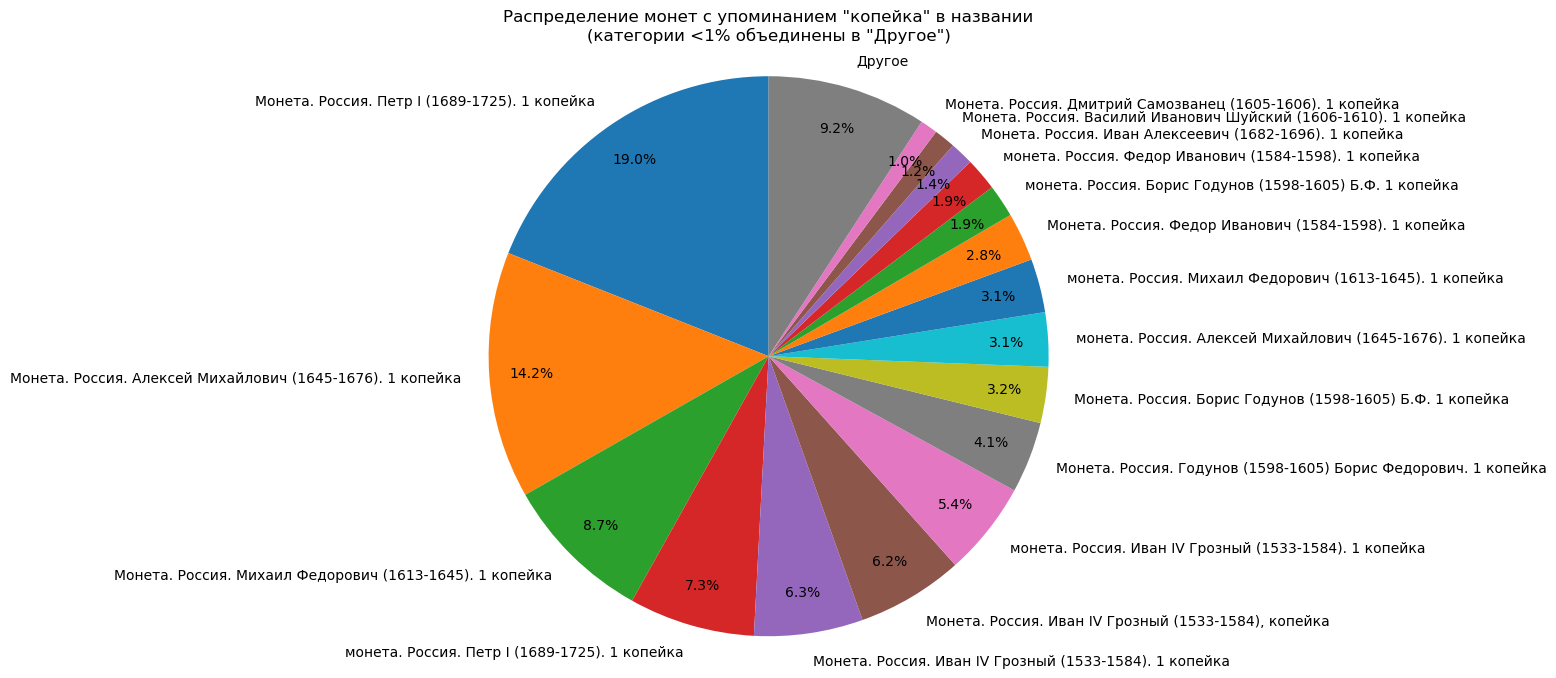

Всего найдено 9182 монет с упоминанием 'копейка'
Из них 17 основных категорий
Объединено 73 категорий в группу 'Другое'

Топ категорий:
data_name
Монета. Россия. Петр I (1689-1725). 1 копейка                     1744
Монета. Россия. Алексей Михайлович (1645-1676). 1 копейка         1308
Монета. Россия. Михаил Федорович (1613-1645). 1 копейка            795
монета. Россия. Петр I (1689-1725). 1 копейка                      667
Монета. Россия. Иван IV Грозный (1533-1584). 1 копейка             577
Монета. Россия. Иван IV Грозный (1533-1584), копейка               566
монета. Россия. Иван IV Грозный (1533-1584). 1 копейка             499
Монета. Россия. Годунов (1598-1605) Борис Федорович. 1 копейка     378
Монета. Россия. Борис Годунов (1598-1605) Б.Ф. 1 копейка           297
монета. Россия. Алексей Михайлович (1645-1676). 1 копейка          287
Name: count, dtype: int64


In [36]:
# Фильтрация данных по наличию "копейка" в названии
russia_coins = df_all[df_all['data_name'].str.contains('копейка', case=False, na=False)]

# Подсчет количества монет
coin_counts = russia_coins['data_name'].value_counts()

# Объединение мелких категорий (менее 1%)
total = coin_counts.sum()
threshold = 0.01 * total  # 1% от общего количества
small_categories = coin_counts[coin_counts < threshold]
other_count = small_categories.sum()

# Создаем новые данные для диаграммы
main_categories = coin_counts[coin_counts >= threshold]
if other_count > 0:
    main_categories['Другое'] = other_count

# Создание круговой диаграммы
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(
    main_categories, 
    labels=main_categories.index, 
    autopct='%1.1f%%', 
    startangle=90,
    pctdistance=0.85
)

# Улучшаем читаемость подписей
for text in texts + autotexts:
    text.set_fontsize(10)

plt.title('Распределение монет с упоминанием "копейка" в названии\n(категории <1% объединены в "Другое")')
plt.axis('equal')

# Отображение диаграммы
plt.show()

# Вывод статистики
print(f"Всего найдено {len(russia_coins)} монет с упоминанием 'копейка'")
print(f"Из них {len(main_categories)-1 if other_count > 0 else len(main_categories)} основных категорий")
if other_count > 0:
    print(f"Объединено {len(small_categories)} категорий в группу 'Другое'")
print("\nТоп категорий:")
print(main_categories.head(10))